In [22]:
####  Import required libraries #########

import pandas as pd
from pathlib import Path as Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pymannkendall as mk
import numpy as np
from matplotlib import gridspec

In [2]:
#### Specify Path of data and Assign libraries ####

Path1=Path('/media/kenz/DISK/Data for publications/')
rainfal_data=pd.read_fwf(Path1/'Yendi_1960_2020_mmRR_cgf.txt', names=['Year','Month','Rainfall'])
# rainfal_data=rainfal_data.groupby('Month').mean('rainfall')
#rainfal_data


#### Monthly rainfall values from 1960-2020

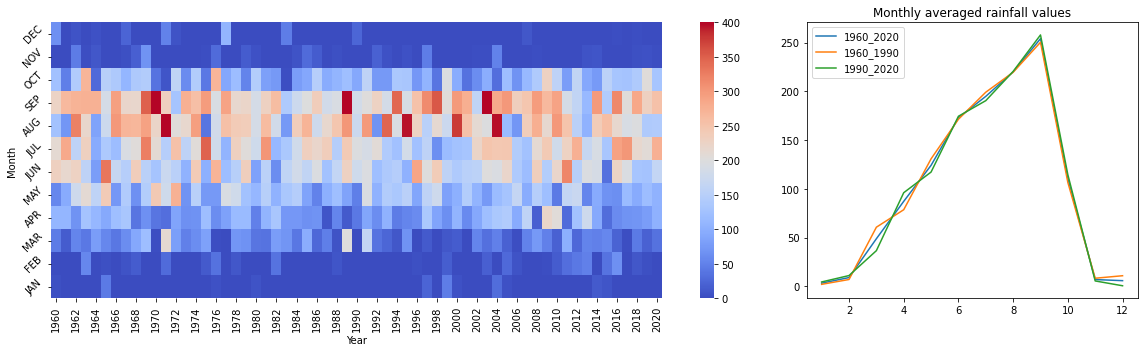

In [21]:
# fig = plt.figure(figsize=(15,4))  ## assign figure to fig and specify figure size###
# f = plt.figure(figsize=(15,4))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), gridspec_kw={'width_ratios': [3, 1.3]})
##### for heatmaps to be plotted data must be pivotted so here we pivot the data.
heatmap1_data = pd.pivot_table(rainfal_data, values='Rainfall', 
                     index=['Month'], 
                     columns='Year')
# ax1 = fig.add_subplot(1,2,1) 
ax1=sns.heatmap(heatmap1_data, cmap="coolwarm", vmax=400, ax=ax1)  ##### plot
labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']
ax1.invert_yaxis()
ax1.set_yticklabels(labels,rotation=45)

    
    
    
r_data=rainfal_data.groupby('Month').mean('rainfall')

r_1960_1990= rainfal_data.loc[0:371,:]
r_1960_1990= r_1960_1990.groupby('Month').mean('rainfall')

r_1990_2020=rainfal_data.loc[372:,:]
r_1990_2020=r_1990_2020.groupby('Month').mean('rainfall')

all_r=[r_data, r_1960_1990, r_1990_2020]
all_l=['1960_2020', '1960_1990', '1990_2020']

# ax2 = fig.add_subplot(1,2,2)

for i in range(3):
    ax2.plot(all_r[i].Rainfall, label=all_l[i])
    ax2.set_title('Monthly averaged rainfall values')
    ax2.legend()
    
    
    
# plt.title('Monthly Rainfall values')
f.tight_layout()

plt.show()

In [5]:
data_1960_2020=rainfal_data.groupby('Month').mean('rainfall')
std1=np.std(rainfal_data.Rainfall)
data_1960_2020['CV']=std1/data_1960_2020['Rainfall']
data_1960_2020.drop('Year', inplace=True, axis=1)
# data_1960_2020

In [6]:
# data_1960_1990=rainfal_data[0:372]
data_1960_1990=rainfal_data.loc[0:371,:]
data_1960_1990=pd.DataFrame(data_1960_1990)
data_1960_1990=data_1960_1990.groupby('Month').mean('rainfall')
std2=np.std(data_1960_1990.Rainfall)
data_1960_1990['CV']=std2/data_1960_1990['Rainfall']
data_1960_1990.drop('Year', inplace=True, axis=1)
# data_1960_1990

In [7]:
data_1990_2020=rainfal_data.loc[372:,:]
data_1990_2020=pd.DataFrame(data_1990_2020)
data_1990_2020=data_1990_2020.groupby('Month').mean('rainfall')
std3=np.std(data_1990_2020.Rainfall)
data_1990_2020['CV']=std3/data_1990_2020['Rainfall']
data_1990_2020.drop('Year', inplace=True, axis=1)
# data_1960_2020


In [8]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']

df = data_1960_2020['CV'].copy()
df=pd.DataFrame(df)
df['CV2']=data_1960_1990['CV']
df['CV3']=data_1990_2020['CV']
columns=[('CV for Rainfall', '1960-2020'), ('CV for Rainfall', '1960-1990'), ('', '1990-2020')] 
df.columns = pd.MultiIndex.from_tuples(columns)
df['Months']=months
df=df.set_index('Months')

df

CV for Rainfall                       
             1960-2020  1960-1990   1990-2020
Months                                       
JAN          31.536042  42.913780   19.780157
FEB          11.316149  12.371719    8.009830
MAR           2.079233   1.422771    2.415502
APR           1.163761   1.097778    0.919277
MAY           0.817241   0.659495    0.753122
JUN           0.586656   0.503281    0.506011
JUL           0.520470   0.433114    0.463464
AUG           0.461029   0.392842    0.400412
SEP           0.399236   0.344527    0.342307
OCT           0.918351   0.809718    0.770958
NOV          14.681694  10.419051   16.070702
DEC          17.541186   7.954563  159.708662

### Standard Rainfall Anomaly

In [24]:
an=rainfal_data.Rainfall

an_df = pd.DataFrame(an)
an_df['Date']=pd.date_range(start='1960-01-01', end='2020-12-31',freq='M')
an_df=an_df.set_index('Date')
dd=an_df.sub(an_df.groupby([an_df.index.month, an_df.index.month]).transform('mean'))
std_1960_2020=an_df.groupby([an_df.index.month]).transform(np.std)
SRA = dd/std_1960_2020

# SRA


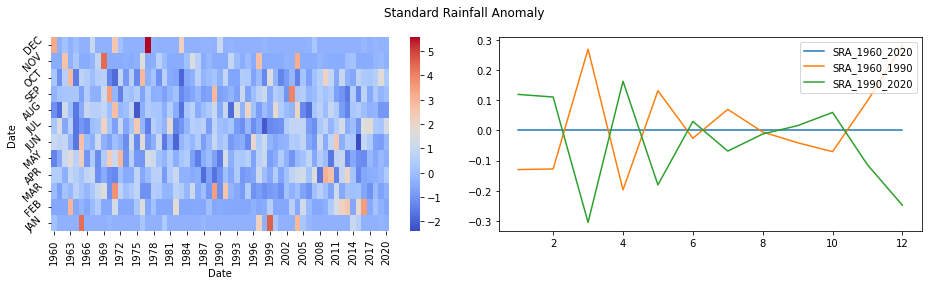

In [25]:
# fig = plt.figure(nrows=1, ncols=2, figsize=(15,4))

fig = plt.figure(figsize=(13,4))

heatmap7_data = pd.pivot_table(SRA, values='Rainfall', 
                     index=SRA.index.month, 
                     columns=SRA.index.year)
ax1 = fig.add_subplot(1,2,1) 
ax1= sns.heatmap(heatmap7_data, cmap="coolwarm")
labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']
ax1.invert_yaxis()
ax1.set_yticklabels(labels,rotation=45)

SRA_1960_2020 = SRA.groupby(SRA.index.month).mean('Rainfall')

SRA_1960_1990 = SRA['1960-01' :'1990-12']
SRA_1960_1990 = SRA_1960_1990.groupby(SRA_1960_1990.index.month).mean('Rainfall')


# SRA_1990_2020=SRA.loc[372:,:]
SRA_1990_2020=SRA['1990-01' :'2020-12']
SRA_1990_2020 = SRA_1990_2020.groupby(SRA_1990_2020.index.month).mean('Rainfall')


l=[SRA_1960_2020, SRA_1960_1990, SRA_1990_2020]
ll=['SRA_1960_2020', 'SRA_1960_1990', 'SRA_1990_2020']
ax2 = fig.add_subplot(1,2,2)
for i in range(3):
    ax2.plot(l[i], label=ll[i])

# ax1.plot(SRA_1960_1990.mean('Rain))
# ax1.plot(SRA_1960_2020.mean())    
    

# ax1.plot(SRA.Rainfall, label='SRA')
ax2.legend()
fig.suptitle('Standard Rainfall Anomaly')

fig.tight_layout()
plt.show()

In [26]:
Rainfall_test=data_1960_2020['Rainfall']
Rainfall_test=pd.DataFrame(Rainfall_test)
Rainfall_test['Date']=pd.date_range(start='1/1960', periods=len(Rainfall_test), freq='M') 
Rainfall_test=Rainfall_test.set_index('Date')
test=Rainfall_test['Rainfall']

NameError: name 'data_1960_2020' is not defined

In [27]:
original_kenda_test = mk.original_test(test,alpha=0.1)

NameError: name 'test' is not defined

In [28]:
original_kenda_test.trend

NameError: name 'original_kenda_test' is not defined

## Temperature

In [29]:
max_tmp=pd.read_fwf(Path1/'Yendi_1960_2020_mmTx_cgf.txt', names=['Year','Month','Temperature'])
min_tmp=pd.read_fwf(Path1/'Yendi_1960_2020_mmTn_cgf.txt', names=['Year','Month','Temperature'])
mean_tmp=pd.read_fwf(Path1/'Yendi_1960_2020_mmTm_cgf.txt', names=['Year','Month','Temperature'])


In [30]:
################  Averaged Monthly Maximum Temperatures for  the three periods

max_tmp_1960_2020=max_tmp.groupby('Month').mean('Temperature')

max_tmp_1960_1990=max_tmp.loc[0:371,:]
max_tmp_1960_1990=max_tmp_1960_1990.groupby('Month').mean('Temperature')

max_tmp_1990_2020=max_tmp.loc[372:,:]
max_tmp_1990_2020=max_tmp_1990_2020.groupby('Month').mean('Temperature')


#################  Averaged Monthly Minimum Temperatures for  the three periods
min_tmp_1960_2020=min_tmp.groupby('Month').mean('Temperature')

min_tmp_1960_1990=min_tmp.loc[0:371,:]
min_tmp_1960_1990=min_tmp_1960_1990.groupby('Month').mean('Temperature')

min_tmp_1990_2020=min_tmp.loc[372:,:]
min_tmp_1990_2020=min_tmp_1990_2020.groupby('Month').mean('Temperature')

##################  Averaged Monthly Maximum Temperatures for  the three periods

mean_tmp_1960_2020=mean_tmp.groupby('Month').mean('Temperature')

mean_tmp_1960_1990=mean_tmp.loc[0:371,:]
mean_tmp_1960_1990=mean_tmp_1960_1990.groupby('Month').mean('Temperature')

mean_tmp_1990_2020=mean_tmp.loc[372:,:]
mean_tmp_1990_2020=mean_tmp_1990_2020.groupby('Month').mean('Temperature')


#### Monthly Temperature values

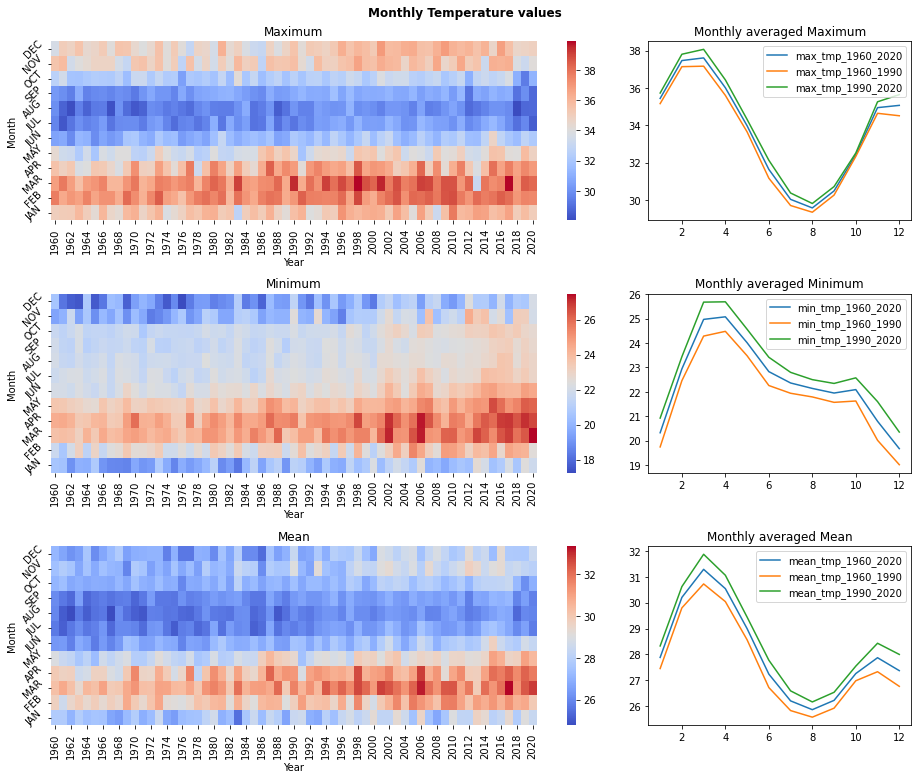

In [31]:

heatmap2_data = pd.pivot_table(max_tmp, values='Temperature', 
                     index=['Month'], 
                     columns='Year')
heatmap3_data = pd.pivot_table(min_tmp, values='Temperature', 
                     index=['Month'], 
                     columns='Year')
heatmap4_data = pd.pivot_table(mean_tmp, values='Temperature', 
                     index=['Month'], 
                     columns='Year')
max_plot=[max_tmp_1960_2020, max_tmp_1960_1990, max_tmp_1990_2020]
max_plot_l=['max_tmp_1960_2020', 'max_tmp_1960_1990', 'max_tmp_1990_2020']

min_plot=[min_tmp_1960_2020, min_tmp_1960_1990, min_tmp_1990_2020]
min_plot_l=['min_tmp_1960_2020', 'min_tmp_1960_1990', 'min_tmp_1990_2020']


mean_plot=[mean_tmp_1960_2020, mean_tmp_1960_1990, mean_tmp_1990_2020]
mean_plot_l=['mean_tmp_1960_2020', 'mean_tmp_1960_1990', 'mean_tmp_1990_2020']


lines = []
tmp_data=[heatmap2_data,heatmap3_data,heatmap4_data]
tmp_data_titles=['Maximum','Minimum','Mean']
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (13,11), gridspec_kw={'width_ratios': [3, 1.3]})
# fig, (ax1, ax2) = plt.subplots(3, 2, figsize=(16,5), gridspec_kw={'width_ratios': [3, 1.3]})


ax=axes.flatten()

labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC']


for i in range(3):
    sns.heatmap(tmp_data[i], ax=ax[i*2], cmap='coolwarm')
    ax[i*2].invert_yaxis()
    ax[i*2].set_yticklabels(labels,rotation=45)
    ax[i*2].set_title(tmp_data_titles[i])
    
    ax[i*2+1].set_title('Monthly averaged '+tmp_data_titles[i])

    ax[1].plot(max_plot[i].Temperature, label=max_plot_l[i])
    ax[3].plot(min_plot[i].Temperature, label=min_plot_l[i])
    ax[5].plot(mean_plot[i].Temperature, label=mean_plot_l[i])
    ax[5].legend()
    ax[3].legend()
    ax[1].legend()
    # # ax[i*2+1].xticks(range(1,13,1))
    #ax[i*2+1].set_xticklabels(labels,rotation=45)
    # for j in range(3):
        # ax[i*2+1].plot(max_plot[j].Temperature)
    
    # ax[i*2+1].plot(max_plot[i].Temperature)
    # ax[i*2+1].plot(mean_plot[i].Temperature)

    # ax[i*2+1].plot(min_plot[i].Temperature)

# plt.legend()
plt.suptitle('Monthly Temperature values', fontweight='bold')
fig.tight_layout()
# plt.legend()
# plt.show()

### Temperature anomaly

In [32]:
an_tmp_max=max_tmp.Temperature

an_tmpmax_df = pd.DataFrame(an_tmp_max)
an_tmpmax_df['date']=pd.date_range(start='1960-01-01', end='2020-12-31',freq='M')
an_tmpmax_df=an_tmpmax_df.set_index('date')
dd1=an_tmpmax_df.sub(an_tmpmax_df.groupby([an_tmpmax_df.index.month, an_tmpmax_df.index.month]).transform('mean'))
std_tmpmax=an_tmpmax_df.groupby([an_tmpmax_df.index.month]).transform(np.std)
T_Anomaly_max = dd1

an_tmp_min=min_tmp.Temperature
an_tmpmin_df = pd.DataFrame(an_tmp_min)
an_tmpmin_df['date']=pd.date_range(start='1960-01-01', end='2020-12-31',freq='M')
an_tmpmin_df=an_tmpmin_df.set_index('date')
dd2=an_tmpmin_df.sub(an_tmpmin_df.groupby([an_tmpmin_df.index.month, an_tmpmin_df.index.month]).transform('mean'))
std_tmpmin=an_tmpmin_df.groupby([an_tmpmin_df.index.month]).transform(np.std)
T_Anomaly_min = dd2

an_tmp_mean=mean_tmp.Temperature
an_tmpmean_df = pd.DataFrame(an_tmp_mean)
an_tmpmean_df['date']=pd.date_range(start='1960-01-01', end='2020-12-31',freq='M')
an_tmpmean_df=an_tmpmean_df.set_index('date')
dd3=an_tmpmean_df.sub(an_tmpmean_df.groupby([an_tmpmean_df.index.month, an_tmpmean_df.index.month]).transform('mean'))
std_tmpmean=an_tmpmean_df.groupby([an_tmpmean_df.index.month]).transform(np.std)
T_Anomaly_mean = dd3

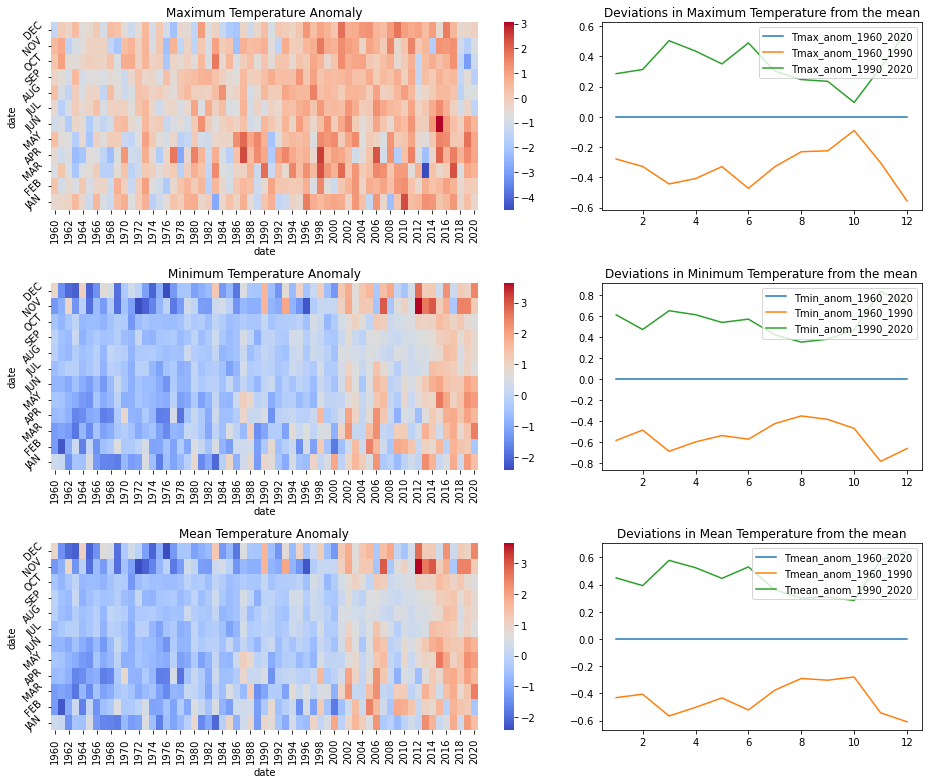

In [37]:
heatmap_data_tmax = pd.pivot_table(T_Anomaly_max, values='Temperature', 
                     index=T_Anomaly_max.index.month, 
                     columns=T_Anomaly_max.index.year)
heatmap3_data_tmin = pd.pivot_table(T_Anomaly_min, values='Temperature', 
                     index=T_Anomaly_min.index.month, 
                     columns=T_Anomaly_min.index.year)
heatmap4_data_tmean = pd.pivot_table(T_Anomaly_min, values='Temperature', 
                     index=T_Anomaly_min.index.month, 
                     columns=T_Anomaly_min.index.year)

tmp_anomaly_plots=[heatmap_data_tmax, heatmap3_data_tmin, heatmap4_data_tmean]
tmp_anomaly_plots_l=['Maximum Temperature Anomaly', 'Minimum Temperature Anomaly', 'Mean Temperature Anomaly']

###################### Anomaly for Maximum Temperature #######################################

Tmax_anom_1960_2020 = T_Anomaly_max.groupby(T_Anomaly_max.index.month).mean('Temperature')

Tmax_anom_1960_1990 = T_Anomaly_max['1960-01' :'1990-12']
Tmax_anom_1960_1990 =  Tmax_anom_1960_1990.groupby(Tmax_anom_1960_1990.index.month).mean()

Tmax_anom_1990_2020 = T_Anomaly_max['1990-01' :'2020-12']
Tmax_anom_1990_2020 = Tmax_anom_1990_2020.groupby(Tmax_anom_1990_2020.index.month).mean()

################################# Anomaly for Min Temperature ################################
Tmin_anom_1960_2020 = T_Anomaly_min.groupby(T_Anomaly_min.index.month).mean()

Tmin_anom_1960_1990 = T_Anomaly_min['1960-01' :'1990-12']
Tmin_anom_1960_1990 = Tmin_anom_1960_1990.groupby(Tmin_anom_1960_1990.index.month).mean()

Tmin_anom_1990_2020 = T_Anomaly_min['1990-01' :'2020-12']
Tmin_anom_1990_2020 = Tmin_anom_1990_2020.groupby(Tmin_anom_1990_2020.index.month).mean()

################################ Anomaly for Mean Temperature #################################
Tmean_anom_1960_2020 = T_Anomaly_mean.groupby(T_Anomaly_mean.index.month).mean()


Tmean_anom_1960_1990 = T_Anomaly_mean['1960-01' :'1990-12']
Tmean_anom_1960_1990 = Tmean_anom_1960_1990.groupby(Tmean_anom_1960_1990.index.month).mean()


Tmean_anom_1990_2020 = T_Anomaly_mean['1990-01' :'2020-12']
Tmean_anom_1990_2020 = Tmean_anom_1990_2020.groupby(Tmean_anom_1990_2020.index.month).mean()

################################################################################################

SRA_max=[Tmax_anom_1960_2020, Tmax_anom_1960_1990, Tmax_anom_1990_2020]
SRA_min=[Tmin_anom_1960_2020, Tmin_anom_1960_1990, Tmin_anom_1990_2020]
SRA_mean=[Tmean_anom_1960_2020, Tmean_anom_1960_1990, Tmean_anom_1990_2020]

SRA_max_l=['Tmax_anom_1960_2020', 'Tmax_anom_1960_1990', 'Tmax_anom_1990_2020']
SRA_min_l=['Tmin_anom_1960_2020', 'Tmin_anom_1960_1990', 'Tmin_anom_1990_2020']
SRA_mean_l=['Tmean_anom_1960_2020', 'Tmean_anom_1960_1990', 'Tmean_anom_1990_2020']

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (13,11), gridspec_kw={'width_ratios': [5, 3]})
ax=axes.flatten()
for i in range(3):



    sns.heatmap(tmp_anomaly_plots[i], ax=ax[i*2], cmap='coolwarm')
    ax[i*2].invert_yaxis()
    ax[i*2].set_yticklabels(labels,rotation=45)
    ax[i*2].set_title(tmp_anomaly_plots_l[i])
    
    ax[i*2+1].set_title('Deviations in '+tmp_data_titles[i]+' Temperature from the mean')

    ax[1].plot(SRA_max[i].Temperature, label=SRA_max_l[i])
    ax[3].plot(SRA_min[i].Temperature, label=SRA_min_l[i])
    ax[5].plot(SRA_mean[i].Temperature, label=SRA_mean_l[i])
    ax[5].legend()
    ax[3].legend()
    ax[1].legend()

    
fig.tight_layout()


